In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from textblob import TextBlob

Step 1: Load the data and understand the data structure
                                                   Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

Step 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gargi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gargi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.



                                         cleaned_text       Labels
0  frankdsuucp frank odwyer newsgroups altatheism...  alt.atheism
1  newsgroups altatheism bilokcforumosrheedu bill...  alt.atheism
2  jimhcarsonuwashingtonedu james hogan newsgroup...  alt.atheism
3  jbrownbatmanbmdtrwcom newsgroups altatheism su...  alt.atheism
4  newsgroups altatheismtalkreligionmisctalkorigi...  alt.atheism

TF-IDF feature matrix shape: (2000, 5000)

Encoded labels Sample: [0 0 0 0 0]

 Sentiment
Positive    1452
Negative     545
Neutral        3
Name: count, dtype: int64


C:\Users\gargi\AppData\Local\Temp\ipykernel_26548\2311856221.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment',data = df_blogs, palette='viridis')


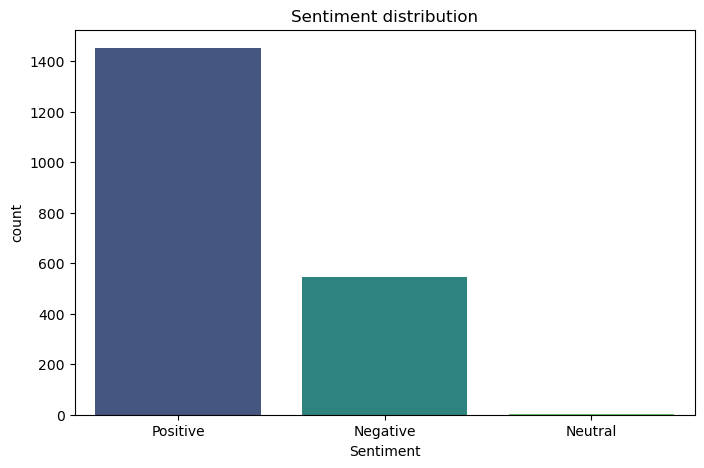

<Figure size 1200x600 with 0 Axes>

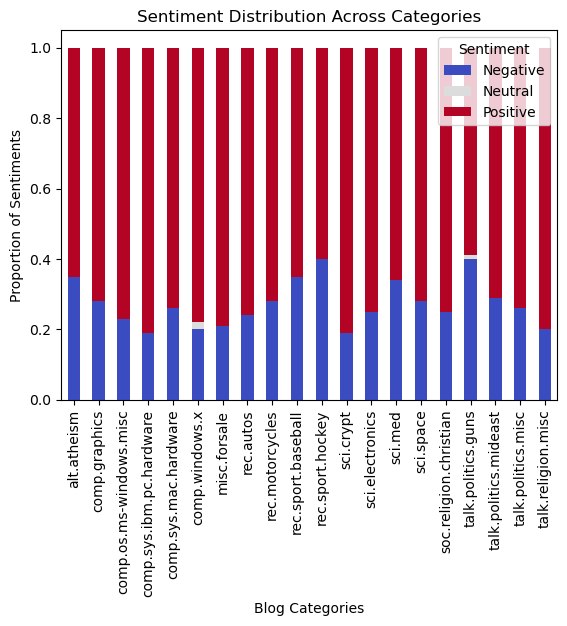


Accuracy: 0.8633

Classification report:
                           precision    recall  f1-score   support

             alt.atheism       0.57      0.96      0.72        24
           comp.graphics       0.86      0.89      0.88        28
 comp.os.ms-windows.misc       0.97      0.91      0.94        33
comp.sys.ibm.pc.hardware       0.85      0.78      0.81        36
   comp.sys.mac.hardware       0.97      0.92      0.94        36
          comp.windows.x       0.94      0.92      0.93        36
            misc.forsale       0.73      0.92      0.81        24
               rec.autos       0.96      0.84      0.90        31
         rec.motorcycles       0.66      0.95      0.78        22
      rec.sport.baseball       0.91      0.97      0.94        32
        rec.sport.hockey       1.00      1.00      1.00        25
               sci.crypt       0.86      1.00      0.92        24
         sci.electronics       0.82      0.85      0.84        27
                 sci.med       0

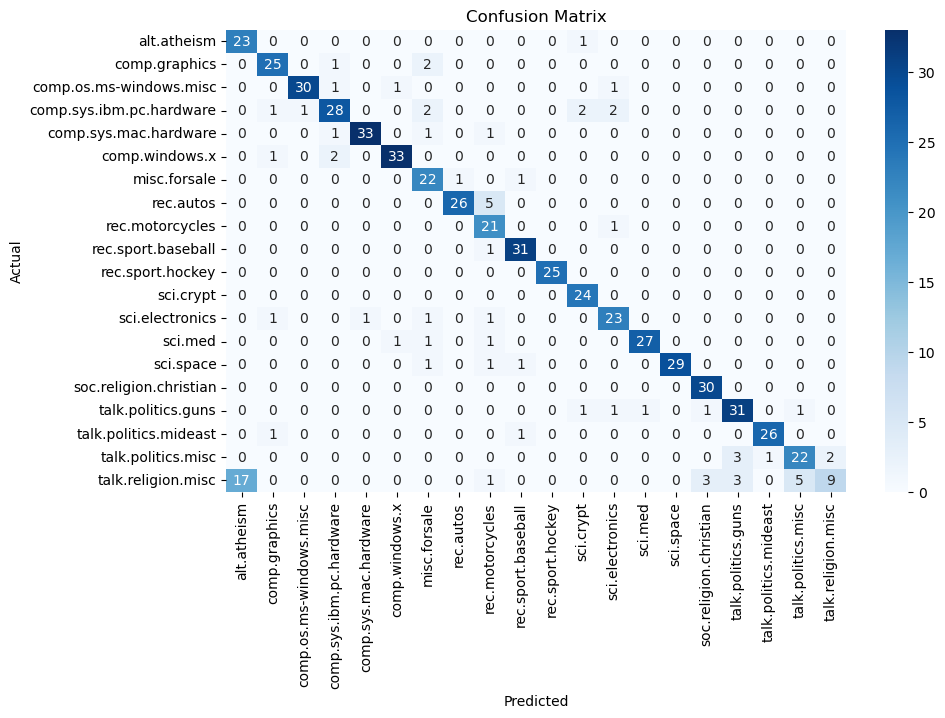

In [9]:
def NLP():
    try:

        print("Step 1: Load the data and understand the data structure")
        df_blogs = pd.read_csv("blogs.csv")
        print(df_blogs)

        print("\nStep 2: Check the data type and column details")
        df_blogs.info()

        print("\nOriginal Data")
        print(df_blogs.describe())

        has_nan = df_blogs.isna().any().any()
        print("Does the dataframe have any NaN values?",has_nan)

        count = df_blogs.isnull().sum()
        print("\nBelow are the count of missing values according to columns:")
        print(count)

        print("\n",df_blogs.head())

        #Download NLTK resources
        nltk.download('stopwords')
        nltk.download('punkt_tab')

        #Initialise stopwords
        stop_words = set(stopwords.words('english'))

        #Text preprocessing function
        def preprocess_text(text):
            #Remove metadata patterns (like 'Path','Newsgroups')
            text = re.sub(r'^(Path: | Newsgroups: |Xref:).*','',text, flags=re.MULTILINE)

            #Remove non - alphabetic characters
            text = re.sub(r'[^a-zA-Z\s]','',text)

            #Convert text to lower
            text = text.lower()

            #Tokenization (Splitting text into words)
            token = word_tokenize(text)

            #Remove stopwords
            filtered_tokens = [word for word in token if word not in stop_words]

            return ' '.join(filtered_tokens)
        
        #Apply the preprocessing function
        df_blogs['cleaned_text'] = df_blogs['Data'].apply(preprocess_text)

        #Display sample results
        print("\n",df_blogs[['cleaned_text', 'Labels']].head(5))

        #Initialize TF-IDF vectorizer
        tfidf_vectorize = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1,2),
            stop_words='english'
        )

        #Transform the cleaned text into numerical format
        X = tfidf_vectorize.fit_transform(df_blogs['cleaned_text'])

        #Display the shape of the resulting feature matrix
        print(f"\nTF-IDF feature matrix shape: {X.shape}")

        #encode labels
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df_blogs['Labels'])

        #Display encoded labels
        print(f"\nEncoded labels Sample: {y[:5]}")

        #Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=42)

        #Initialize multinomial Naive bayes model
        nb_model = MultinomialNB()

        #Train the model
        nb_model.fit(X_train,y_train)

        #Predictions on the test set
        y_pred = nb_model.predict(X_test)

        #Sentiment analysis function
        def get_sentiment(text):
            analysis = TextBlob(text)
            if analysis.sentiment.polarity >0:
                return 'Positive'
            elif analysis.sentiment.polarity <0:
                return 'Negative'
            else:
                return 'Neutral'
            
        #Apply the function
        df_blogs['Sentiment'] = df_blogs['cleaned_text'].apply(get_sentiment)

        #Display sentiment distribution
        print("\n",df_blogs['Sentiment'].value_counts())

        #Sentiment distribution plot
        plt.figure(figsize=(8,5))
        sns.countplot(x='Sentiment',data = df_blogs, palette='viridis')
        plt.title('Sentiment distribution')
        plt.savefig("Sentiment distribution.png",dpi=300)
        plt.show()

        sentiment_by_category = df_blogs.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

        #Visualizing the sentiment distribution
        plt.figure(figsize=(12,6))
        sentiment_by_category.plot(kind='bar',stacked=True,cmap='coolwarm')
        plt.title("Sentiment Distribution Across Categories")
        plt.xlabel("Blog Categories")
        plt.ylabel("Proportion of Sentiments")
        plt.legend(title='Sentiment')
        plt.savefig("Sentiment Distribution Across Categories.png",dpi=300)
        plt.show()

        #Evaluation metrics
        accuracy = accuracy_score(y_test,y_pred)
        print(f"\nAccuracy: {accuracy:.4f}")
        print("\nClassification report:\n",classification_report(y_test,y_pred, target_names=label_encoder.classes_) )

        plt.figure(figsize=(10,6))
        sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.savefig("Confusion matrix.png",dpi=300)
        plt.show()


    except FileNotFoundError:
        print("Error")



NLP()